In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

170500096/170498071 [==============================] - 2s 0us/step


(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

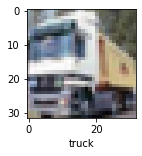

In [ ]:
plot_sample(X_train, y_train, 1)

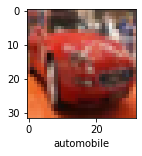

In [ ]:
plot_sample(X_train, y_train, 5)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

ANN model


In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.9302 - accuracy: 0.3088
Epoch 2/5
1563/1563 [==============================] - 102s 65ms/step - loss: 1.6473 - accuracy: 0.4210
Epoch 3/5
1563/1563 [==============================] - 98s 63ms/step - loss: 1.5466 - accuracy: 0.4495
Epoch 4/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4878 - accuracy: 0.4760
Epoch 5/5
1563/1563 [==============================] - 99s 63ms/step - loss: 1.4344 - accuracy: 0.4973


In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.73      0.33      0.46      1000
           1       0.68      0.41      0.51      1000
           2       0.46      0.17      0.25      1000
           3       0.39      0.22      0.28      1000
           4       0.45      0.35      0.40      1000
           5       0.29      0.52      0.37      1000
           6       0.37      0.77      0.50      1000
           7       0.69      0.38      0.49      1000
           8       0.70      0.44      0.54      1000
           9       0.35      0.78      0.48      1000

    accuracy                           0.44     10000
   macro avg       0.51      0.44      0.43     10000
weighted avg       0.51      0.44      0.43     10000



In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 60s 38ms/step - loss: 1.7468 - accuracy: 0.3577
Epoch 2/20
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1896 - accuracy: 0.5797
Epoch 3/20
1563/1563 [==============================] - 61s 39ms/step - loss: 1.0262 - accuracy: 0.6409
Epoch 4/20
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9395 - accuracy: 0.6741
Epoch 5/20
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8693 - accuracy: 0.6987
Epoch 6/20
1563/1563 [==============================] - 59s 38ms/step - loss: 0.8170 - accuracy: 0.7179
Epoch 7/20
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7748 - accuracy: 0.7300
Epoch 8/20
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7216 - accuracy: 0.7497
Epoch 9/20
1563/1563 [==============================] - 59s 38ms/step - loss: 0.6893 - accuracy: 0.7604
Epoch 10/20
1563/1563 [==============================] - 59s 38m

In [ ]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 4s 12ms/step - loss: 1.0473 - accuracy: 0.7038


[1.0473154783248901, 0.7038000226020813]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[1.3790434e-05, 2.3348797e-07, 1.0095722e-04, 8.4832692e-01,
        8.4135434e-05, 1.4403750e-01, 7.4258116e-03, 7.0182165e-07,
        5.5686701e-07, 9.3422586e-06],
       [5.5392127e-05, 5.3280252e-03, 9.3261451e-07, 4.9850723e-08,
        6.0313508e-12, 9.3844621e-10, 1.2649798e-09, 8.8728616e-12,
        9.9461007e-01, 5.5967544e-06],
       [2.4192698e-01, 1.5360369e-01, 9.5638394e-04, 1.2130367e-02,
        3.6663027e-05, 8.5509487e-04, 3.3091076e-04, 1.0580407e-04,
        4.6429494e-01, 1.2575918e-01],
       [9.9709547e-01, 1.4111649e-03, 9.5811294e-04, 8.8672336e-05,
        3.7189206e-04, 5.9840293e-09, 1.3021844e-05, 2.2493969e-06,
        5.6397977e-05, 2.9961639e-06],
       [4.0999561e-07, 4.4956951e-07, 7.7338484e-03, 6.5690861e-04,
        6.0896468e-01, 8.1198879e-05, 3.8256109e-01, 1.2360149e-08,
        1.2768140e-06, 2.0553829e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

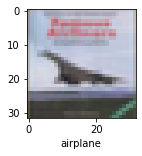

In [ ]:
plot_sample(X_test, y_test,3)

In [ ]:
classes[y_classes[3]]

'airplane'